In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# 맵 
import json
import geopandas as gpd
# import googlemaps
import requests
from shapely.geometry import Point,LineString,Polygon

# matplotlib
from adjustText import adjust_text
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from datetime import datetime

# 진행상황
from IPython.display import display
from tqdm import tqdm

# 폰트
import matplotlib.font_manager as fm
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus']=False
path = 'malgun.ttf'
fontprop = fm.FontProperties(fname=path, size=13)

# 경고제어
import warnings
warnings.filterwarnings('ignore')

### 4페이지

100%|██████████| 5891/5891 [00:01<00:00, 3134.90it/s]


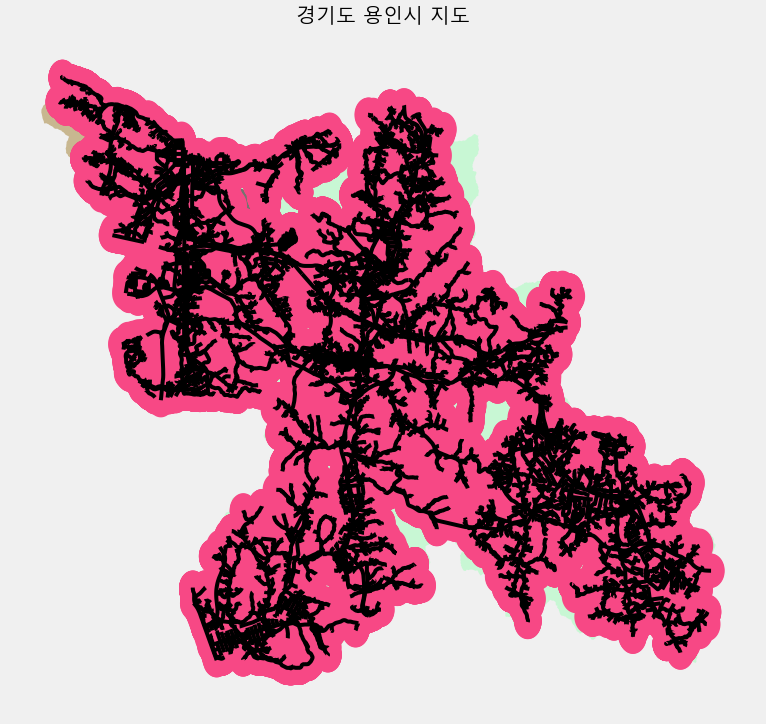

In [2]:
m=gpd.read_file('11.용인시_법정경계(시군구).geojson')
loads=gpd.read_file('9.용인시_도로명주소_도로.geojson')

# line to point
ltp={'geometry':[]}
for load in tqdm(loads['geometry']):
    for xy in load[0].coords:
        y,x=xy
        ltp['geometry'].append(Point(y,x))
ltp=gpd.GeoDataFrame(ltp,geometry='geometry')
# display(ltp.head())

# 1도의 거리는 133km 1초의 거리는 37m. 100m 기준으로.
ltp_buf=gpd.GeoDataFrame({'geometry':ltp.buffer(1/120)})

ax=m.plot(figsize=(12,12), alpha=0.8,column='SIG_KOR_NM',color=['#beface','#54574f','#bfa978'],
          legend=True,legend_kwds={'bbox_to_anchor':(1.5,1),'prop':fontprop}) # 겹쳐서 안보인다.

ltp_buf.plot(ax=ax,color='#f74885') # 핑크 
loads.plot(ax=ax,color='black')
ax.set_title("경기도 용인시 지도", fontsize=20,fontproperties=fontprop)
ax.set_axis_off()

plt.show()

### 5페이지

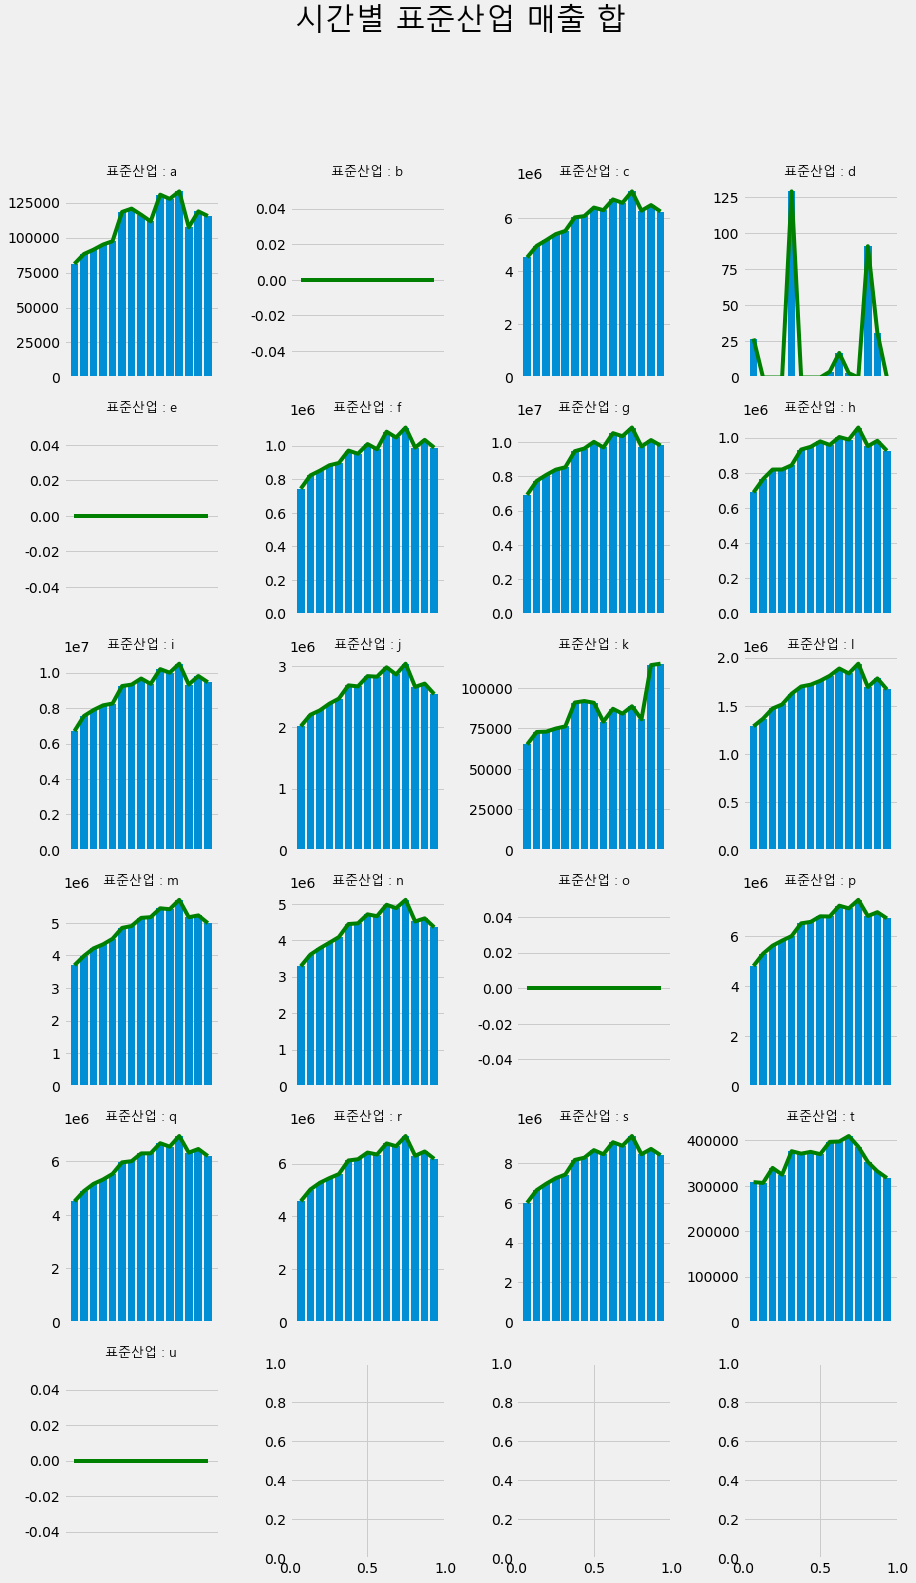

In [3]:
store=pd.read_csv('17.용인시_소상공인_매출정보.csv')

a = store[store['indcd_a_yn'] =='Y'].sum()[23:38]
b = store[store['indcd_b_yn'] =='Y'].sum()[23:38]
c = store[store['indcd_c_yn'] =='Y'].sum()[23:38]
d = store[store['indcd_d_yn'] =='Y'].sum()[23:38]
e = store[store['indcd_e_yn'] =='Y'].sum()[23:38]
f = store[store['indcd_f_yn'] =='Y'].sum()[23:38]
g = store[store['indcd_g_yn'] =='Y'].sum()[23:38]
h = store[store['indcd_h_yn'] =='Y'].sum()[23:38]
i = store[store['indcd_i_yn'] =='Y'].sum()[23:38]
j = store[store['indcd_j_yn'] =='Y'].sum()[23:38]
k = store[store['indcd_k_yn'] =='Y'].sum()[23:38]
l = store[store['indcd_l_yn'] =='Y'].sum()[23:38]
m = store[store['indcd_m_yn'] =='Y'].sum()[23:38]
n = store[store['indcd_n_yn'] =='Y'].sum()[23:38]
o = store[store['indcd_o_yn'] =='Y'].sum()[23:38]
p = store[store['indcd_p_yn'] =='Y'].sum()[23:38]
q = store[store['indcd_q_yn'] =='Y'].sum()[23:38]
r = store[store['indcd_r_yn'] =='Y'].sum()[23:38]
s = store[store['indcd_s_yn'] =='Y'].sum()[23:38]
t = store[store['indcd_t_yn'] =='Y'].sum()[23:38]
u = store[store['indcd_u_yn'] =='Y'].sum()[23:38]

alphabet = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u]

fig,ax=plt.subplots(6,4,figsize=(13,20))
labels=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u']

for idx,(alpha,label) in enumerate(zip(alphabet,labels)):
    ax[idx//4,idx%4].bar(x=alpha.index,height=alpha)
    ax[idx//4,idx%4].plot(alpha,color='green')
    ax[idx//4,idx%4].set_title(f"표준산업 : {label}",fontproperties=fontprop)
    ax[idx//4,idx%4].set_xticks([])

plt.tight_layout()
plt.suptitle("시간별 표준산업 매출 합",fontproperties=fontprop,position=(0.5,1.1),fontsize=30)
plt.show()

### 6페이지

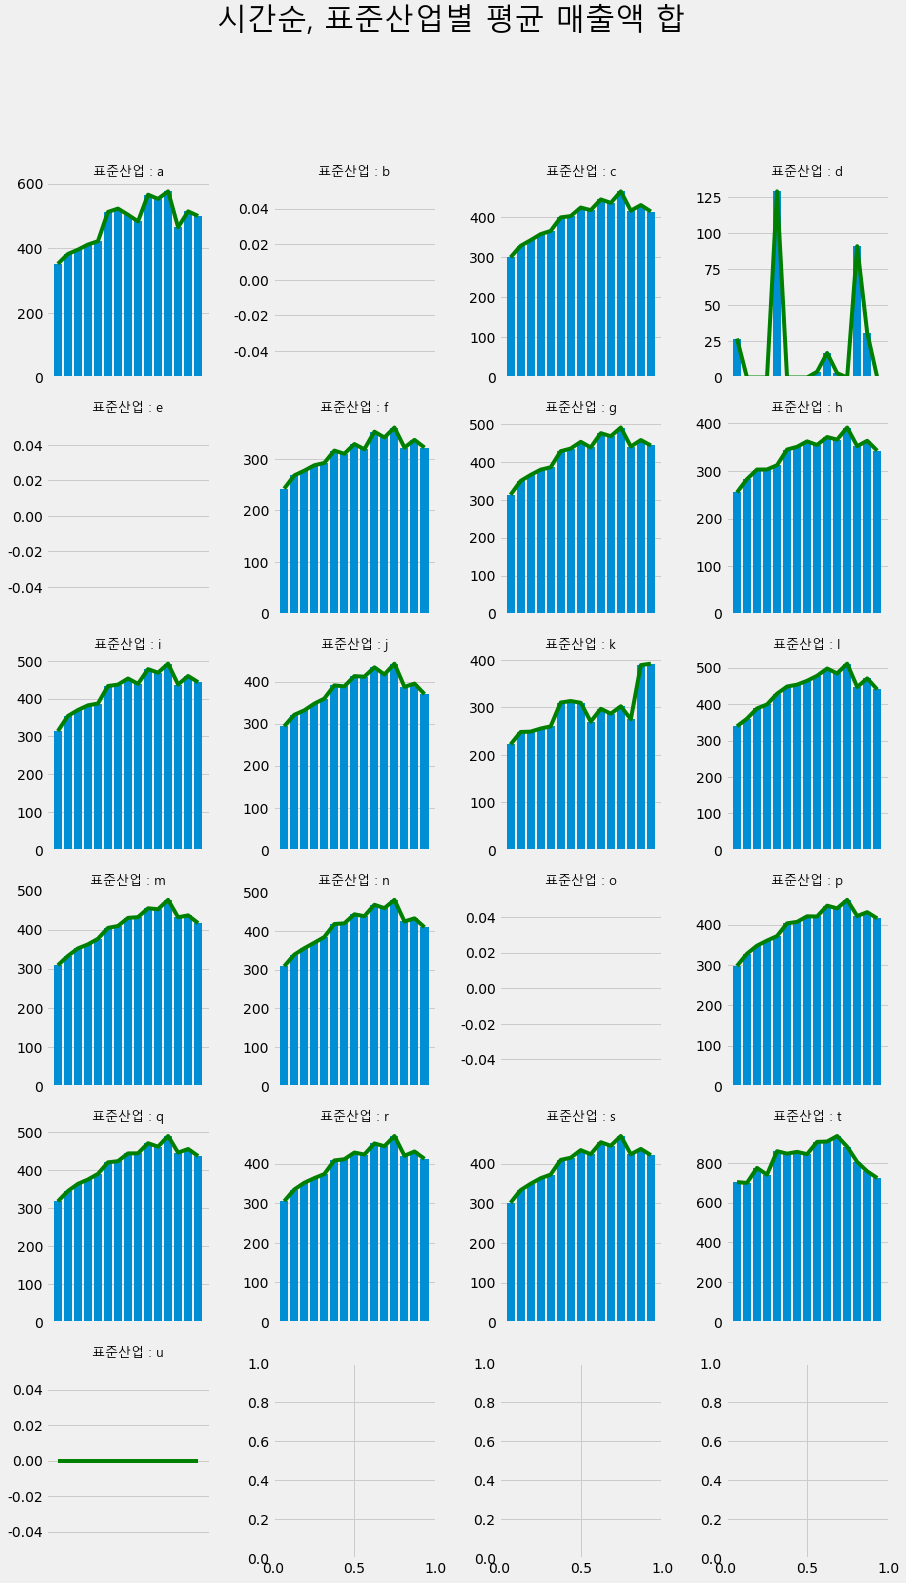

In [4]:
a = store[store['indcd_a_yn'] =='Y'].sum()[23:38]/store[store['indcd_a_yn'] =='Y'].ws_cnt.sum()
b = store[store['indcd_b_yn'] =='Y'].sum()[23:38]/store[store['indcd_b_yn'] =='Y'].ws_cnt.sum()
c = store[store['indcd_c_yn'] =='Y'].sum()[23:38]/store[store['indcd_c_yn'] =='Y'].ws_cnt.sum()
d = store[store['indcd_d_yn'] =='Y'].sum()[23:38]/store[store['indcd_d_yn'] =='Y'].ws_cnt.sum()
e = store[store['indcd_e_yn'] =='Y'].sum()[23:38]/store[store['indcd_e_yn'] =='Y'].ws_cnt.sum()
f = store[store['indcd_f_yn'] =='Y'].sum()[23:38]/store[store['indcd_f_yn'] =='Y'].ws_cnt.sum()
g = store[store['indcd_g_yn'] =='Y'].sum()[23:38]/store[store['indcd_g_yn'] =='Y'].ws_cnt.sum()
h = store[store['indcd_h_yn'] =='Y'].sum()[23:38]/store[store['indcd_h_yn'] =='Y'].ws_cnt.sum()
i = store[store['indcd_i_yn'] =='Y'].sum()[23:38]/store[store['indcd_i_yn'] =='Y'].ws_cnt.sum()
j = store[store['indcd_j_yn'] =='Y'].sum()[23:38]/store[store['indcd_j_yn'] =='Y'].ws_cnt.sum()
k = store[store['indcd_k_yn'] =='Y'].sum()[23:38]/store[store['indcd_k_yn'] =='Y'].ws_cnt.sum()
l = store[store['indcd_l_yn'] =='Y'].sum()[23:38]/store[store['indcd_l_yn'] =='Y'].ws_cnt.sum()
m = store[store['indcd_m_yn'] =='Y'].sum()[23:38]/store[store['indcd_m_yn'] =='Y'].ws_cnt.sum()
n = store[store['indcd_n_yn'] =='Y'].sum()[23:38]/store[store['indcd_n_yn'] =='Y'].ws_cnt.sum()
o = store[store['indcd_o_yn'] =='Y'].sum()[23:38]/store[store['indcd_o_yn'] =='Y'].ws_cnt.sum()
p = store[store['indcd_p_yn'] =='Y'].sum()[23:38]/store[store['indcd_p_yn'] =='Y'].ws_cnt.sum()
q = store[store['indcd_q_yn'] =='Y'].sum()[23:38]/store[store['indcd_q_yn'] =='Y'].ws_cnt.sum()
r = store[store['indcd_r_yn'] =='Y'].sum()[23:38]/store[store['indcd_r_yn'] =='Y'].ws_cnt.sum()
s = store[store['indcd_s_yn'] =='Y'].sum()[23:38]/store[store['indcd_s_yn'] =='Y'].ws_cnt.sum()
t = store[store['indcd_t_yn'] =='Y'].sum()[23:38]/store[store['indcd_t_yn'] =='Y'].ws_cnt.sum()

alphabet = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u]

fig,ax=plt.subplots(6,4,figsize=(13,20))
labels=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u']

for idx,(alpha,label) in enumerate(zip(alphabet,labels)):
    ax[idx//4,idx%4].bar(x=alpha.index,height=alpha)
    ax[idx//4,idx%4].plot(alpha,color='green')
    ax[idx//4,idx%4].set_title(f"표준산업 : {label}",fontproperties=fontprop)
    ax[idx//4,idx%4].set_xticks([])

plt.tight_layout()
plt.suptitle("시간순, 표준산업별 평균 매출액 합",fontproperties=fontprop,position=(0.5,1.1),fontsize=30)
plt.show()

### 15페이지

In [7]:
geo=gpd.read_file('16.용인시_소상공인_매출정보.geojson')
geo=geo.set_index('gid')
#a_geo
df_a=store[store.indcd_a_yn=='Y']
v3 = df_a.gid.values
a_geo = geo.loc[v3]
a_drop = a_geo.drop(['indcd_a_yn','indcd_b_yn','indcd_c_yn','indcd_d_yn', 'indcd_e_yn','indcd_f_yn','indcd_g_yn',
            'indcd_h_yn','indcd_i_yn','indcd_j_yn','indcd_k_yn','indcd_l_yn','indcd_m_yn','indcd_n_yn',
            'indcd_o_yn','indcd_p_yn','indcd_q_yn','indcd_r_yn','indcd_s_yn','indcd_t_yn','indcd_u_yn'], axis = 1)
a_drop = a_drop.drop(['age10_ratio', 'age20_ratio', 'age30_ratio','age40_ratio','age50_ratio','age60_ratio','age70_ratio'], axis = 1)
a_drop = a_drop.dropna()
a_drop.sum(axis = 0)
a_drop.append(a_drop.sum(axis=0), ignore_index = True)
a_copy = a_drop.append(a_drop.sum(axis=0), ignore_index = True)

a2 = a_drop.sum(axis=0)

<AxesSubplot:title={'center':'years'}>

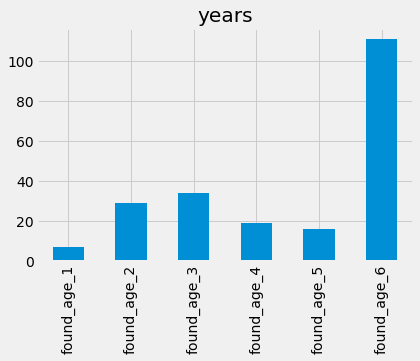

In [8]:
a2[1:7].plot(kind='bar',grid = True, title = 'years')

### 16페이지

<AxesSubplot:title={'center':'years'}, ylabel='None'>

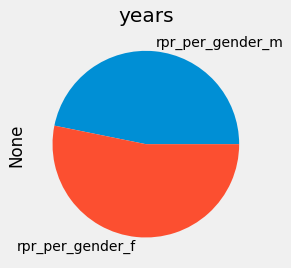

In [9]:
a2[9:11].plot(kind='pie',grid = True, title = 'years')

### 17페이지

<AxesSubplot:title={'center':'years'}, ylabel='None'>

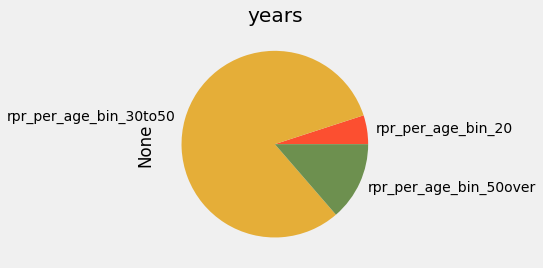

In [10]:
a2[11:15].plot(kind='pie',grid = True, title = 'years')

### 18페이지

In [11]:
a2[15:22]

sme_loan_cnt    92.0
sme_loan_y_1     8.0
sme_loan_y_2     8.0
sme_loan_y_3    11.0
sme_loan_y_4    26.0
sme_loan_y_5    16.0
sme_loan_y_6    23.0
dtype: float64

<AxesSubplot:title={'center':'# of Loan (a)'}, ylabel='None'>

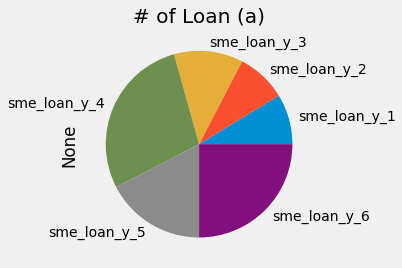

In [12]:
a2[16:22].plot(kind='pie',grid = True, title = '# of Loan (a)')

<AxesSubplot:title={'center':'# of Loan (a)'}>

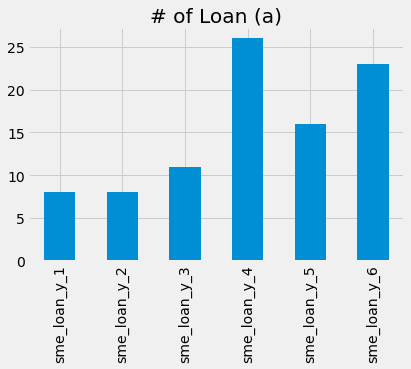

In [13]:
a2[16:22].plot(kind='bar',grid = True, title = '# of Loan (a)')

### 20페이지

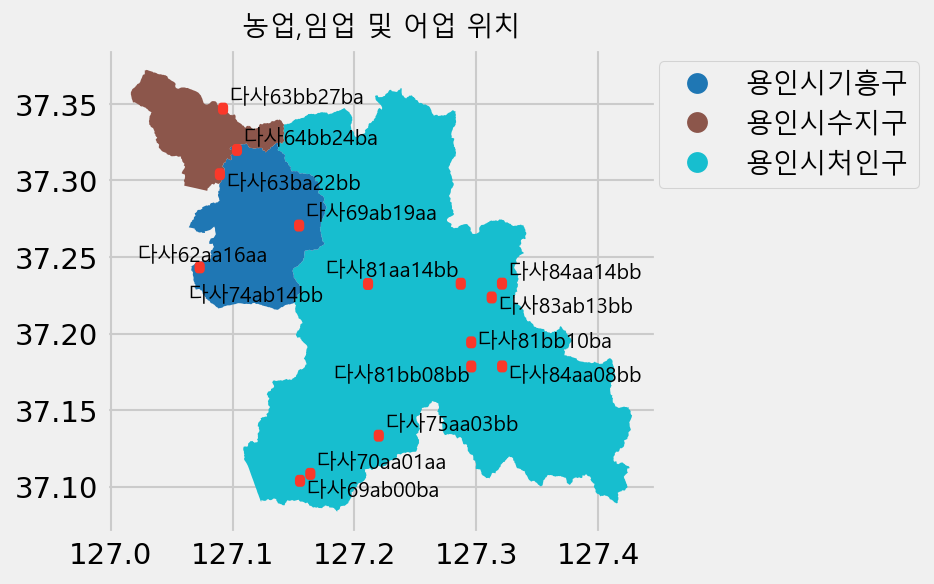

In [14]:
# https://stackoverflow.com/questions/19073683/matplotlib-overlapping-annotations-text
m=gpd.read_file('11.용인시_법정경계(시군구).geojson')
fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=150)
ax.set_aspect('equal')

m.plot(ax=ax,column='SIG_KOR_NM',legend=True,
        legend_kwds={'bbox_to_anchor':(1.5,1),'prop':fontprop})
geo.loc[df_a.gid.values]['geometry'].buffer(1/360).plot(color='#fa382a',ax=ax)

ax.set_title("농업,임업 및 어업 위치",fontproperties=fontprop)

texts=[]
for text,lng,lat in zip(geo.loc[df_a.gid.values]['geometry'].index,geo.loc[df_a.gid.values]['geometry'].bounds['maxx'],geo.loc[df_a.gid.values]['geometry'].bounds['maxy']):
    texts.append(plt.text(x=lng,y=lat,s=text,fontdict={'size':10,'fontproperties':fontprop}))
    
adjust_text(texts, only_move={'points':'x', 'texts':'x','texts':'y'})
plt.show()

### 21페이지

In [15]:
# 주소 빼기
arr=[]
for area in geo.loc[df_a.gid.values]['geometry']:
    n=len(arr)
    for gu in m.geometry:
        if gu.contains(area):
            arr.append(m.loc[m['geometry']==gu,'SIG_KOR_NM'])
        l=len(arr)
    if l==n:
        arr.append(area)

# 일부 직접 고치기
arr[2]='용인시수지구'
arr[3]='용인시기흥구'

# value 값 얻기
for a in range(15):
    if type(arr[a])!=str:
        arr[a]=arr[a].item()
    
# 전처리
df_a['구']=arr

In [16]:
yg=df_a[df_a['구']=='용인시기흥구']
ys=df_a[df_a['구']=='용인시수지구']
yc=df_a[df_a['구']=='용인시처인구']

# yc 처인 yg 기흥 ys 수지
yc=yc.sum(axis=0)
yg=yg.sum(axis=0)
ys=ys.sum(axis=0)

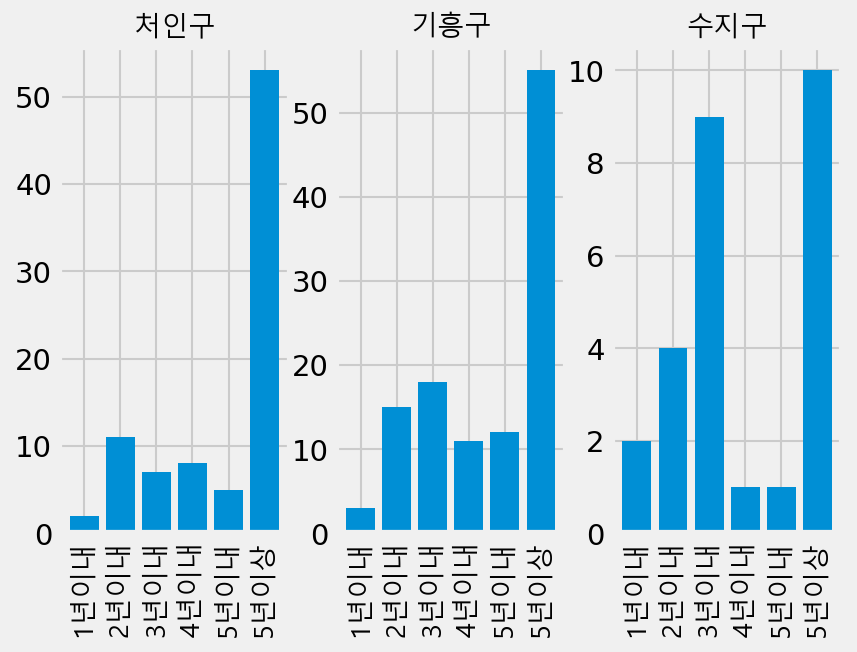

In [17]:
fig,ax=plt.subplots(1,3,figsize=(6,4),dpi=150)
labels=['1년이내','2년이내','3년이내','4년이내','5년이내','5년이상']

ax[0].bar(x=yc[2:8].index,height=yc[2:8])
ax[0].set_title("처인구",fontproperties=fontprop)
ax[0].set_xticklabels(labels,fontproperties=fontprop,rotation=90)
ax[1].bar(x=yg[2:8].index,height=yg[2:8])
ax[1].set_title("기흥구",fontproperties=fontprop)
ax[1].set_xticklabels(labels,fontproperties=fontprop,rotation=90)
ax[2].bar(x=ys[2:8].index,height=ys[2:8])
ax[2].set_title("수지구",fontproperties=fontprop)
ax[2].set_xticklabels(labels,fontproperties=fontprop,rotation=90)

plt.show()

### 22페이지

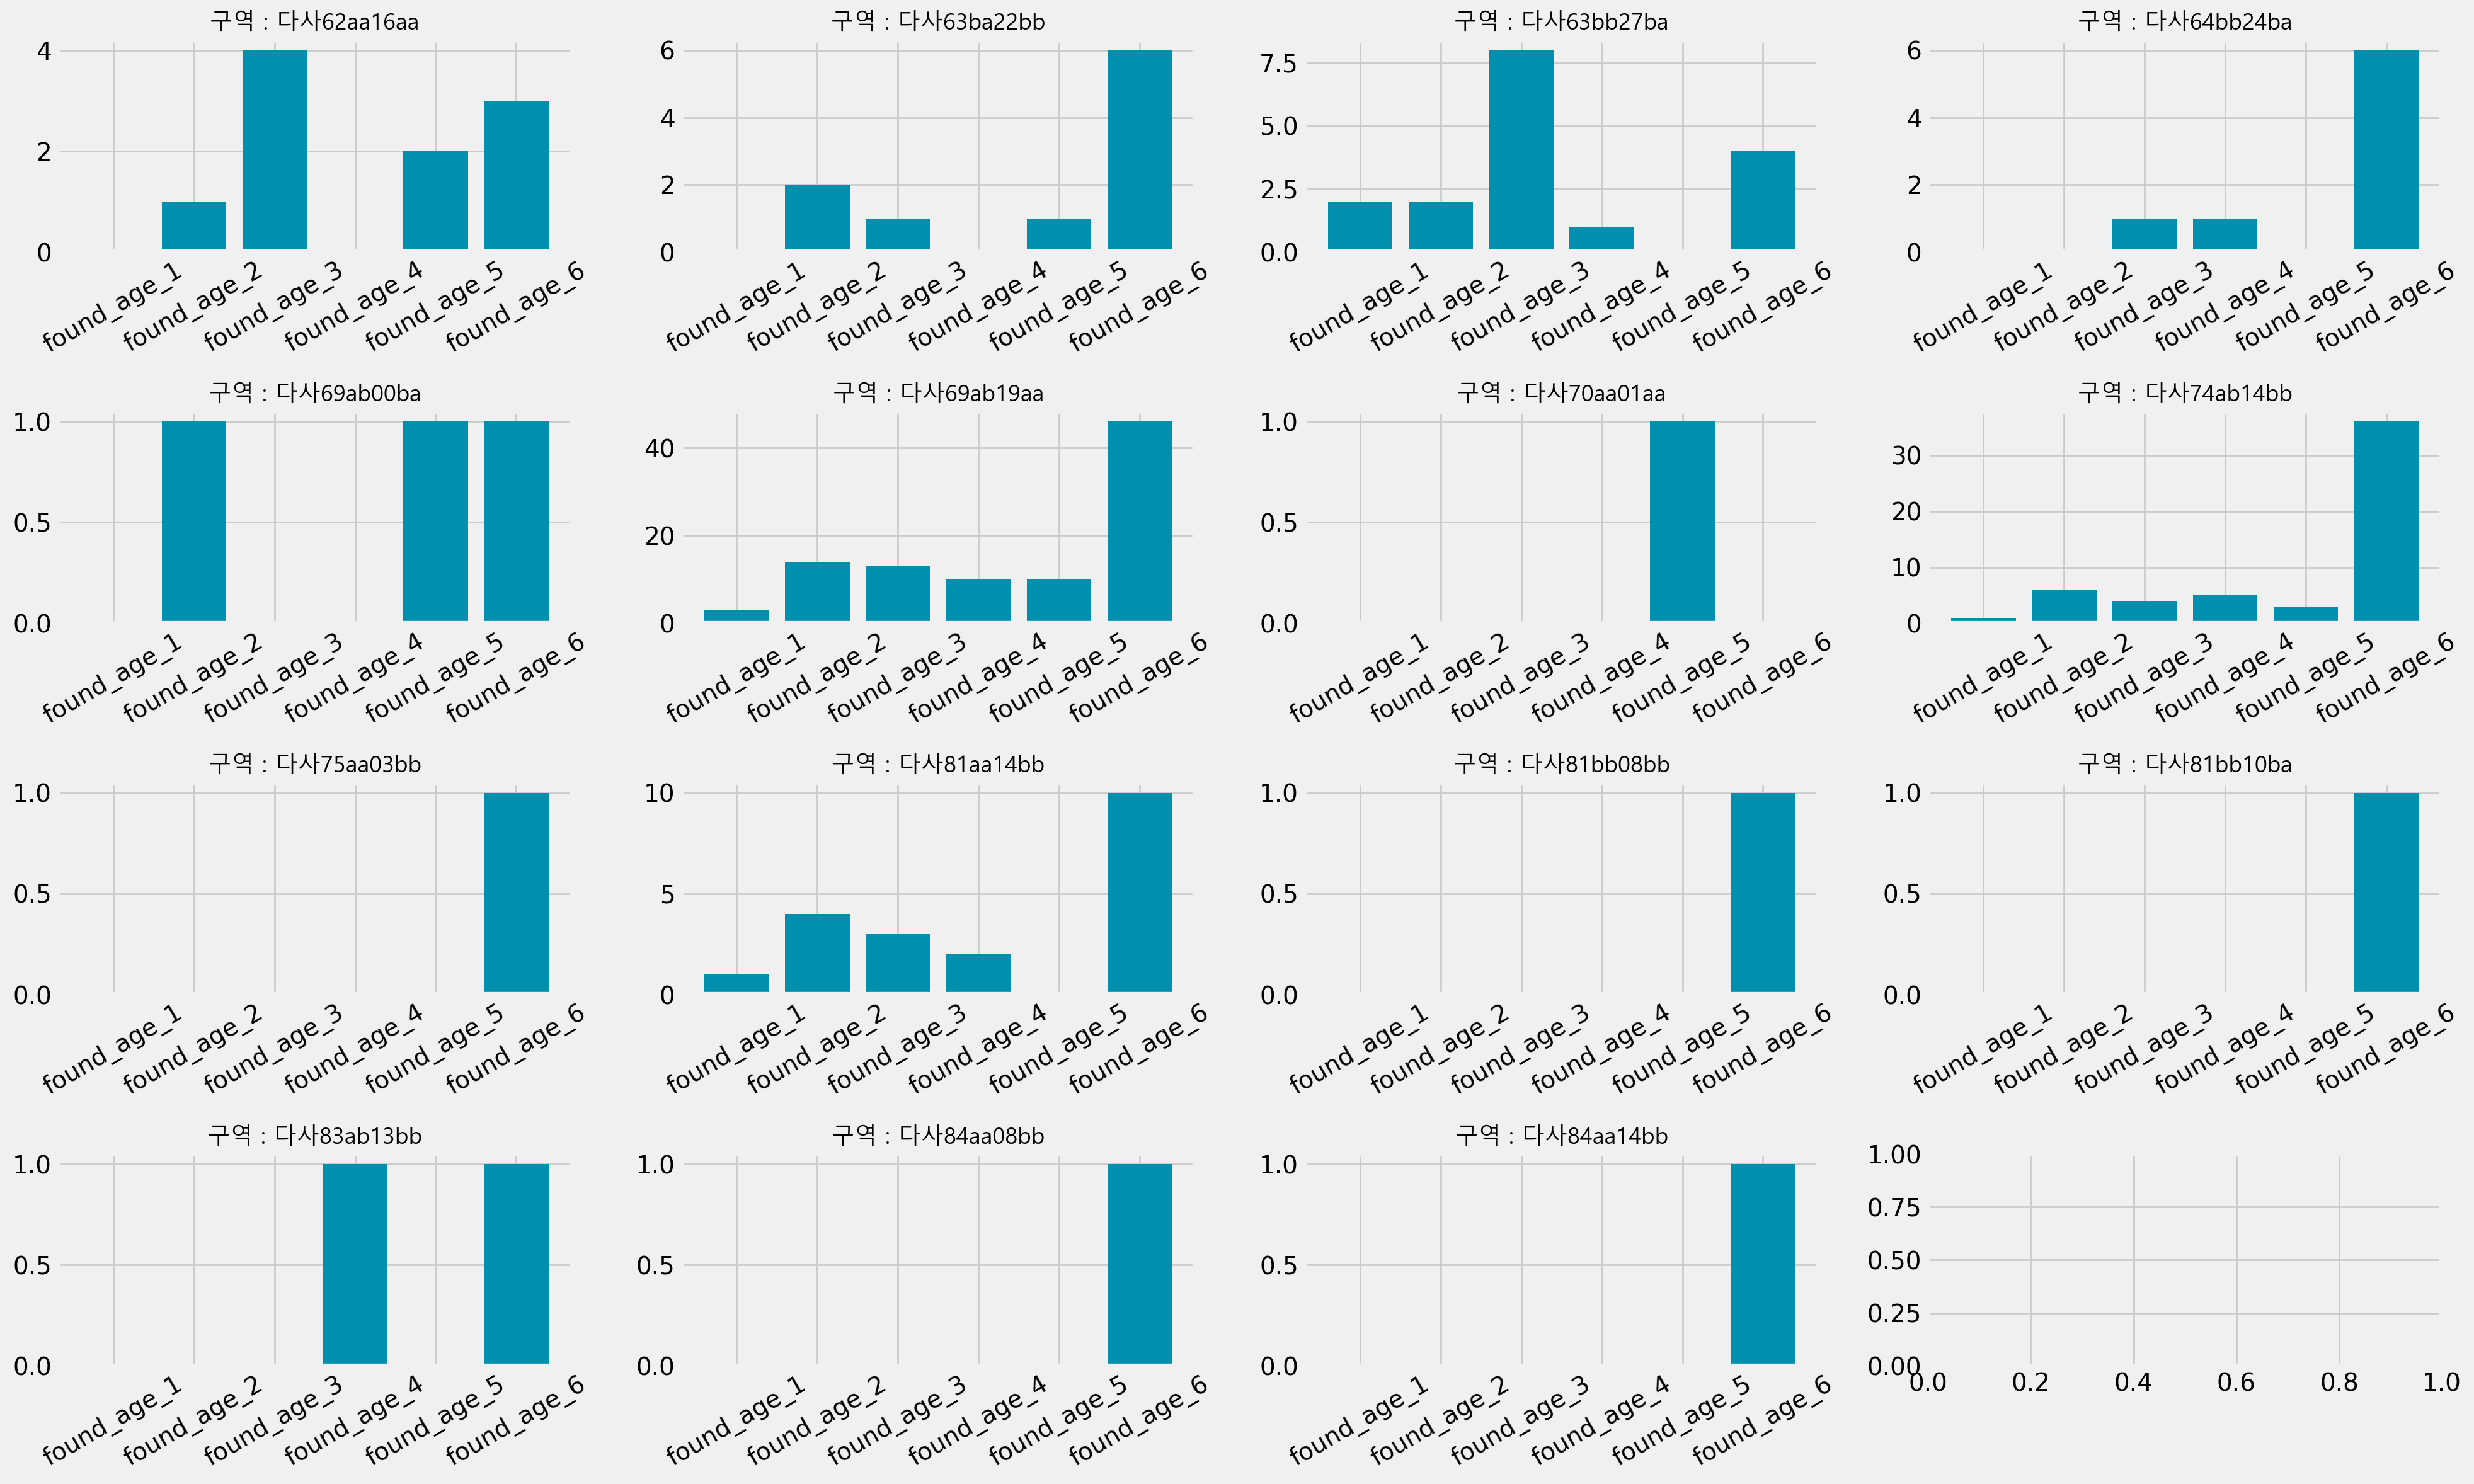

In [18]:
# 몇년 미만의 사업장 
cols=[col for col in df_a.columns if 'found' in col]
# 정리
df_a_sample=df_a.reset_index()
# grid plot
fig,axs=plt.subplots(4,4,figsize=(20,12),dpi=200)

for i in range(len(df_a_sample)):
    title=df_a_sample.loc[i,'gid']
    axs[i//4,i%4].bar(x=df_a_sample[cols].T.index,height=df_a_sample[cols].T[i].values,color='#008FAD')
    axs[i//4,i%4].set_title(f"구역 : {title}",fontproperties=fontprop)
    axs[i//4,i%4].set_xticklabels(labels=df_a_sample[cols].T.index,rotation=30)

plt.tight_layout()
plt.show()

### 23페이지

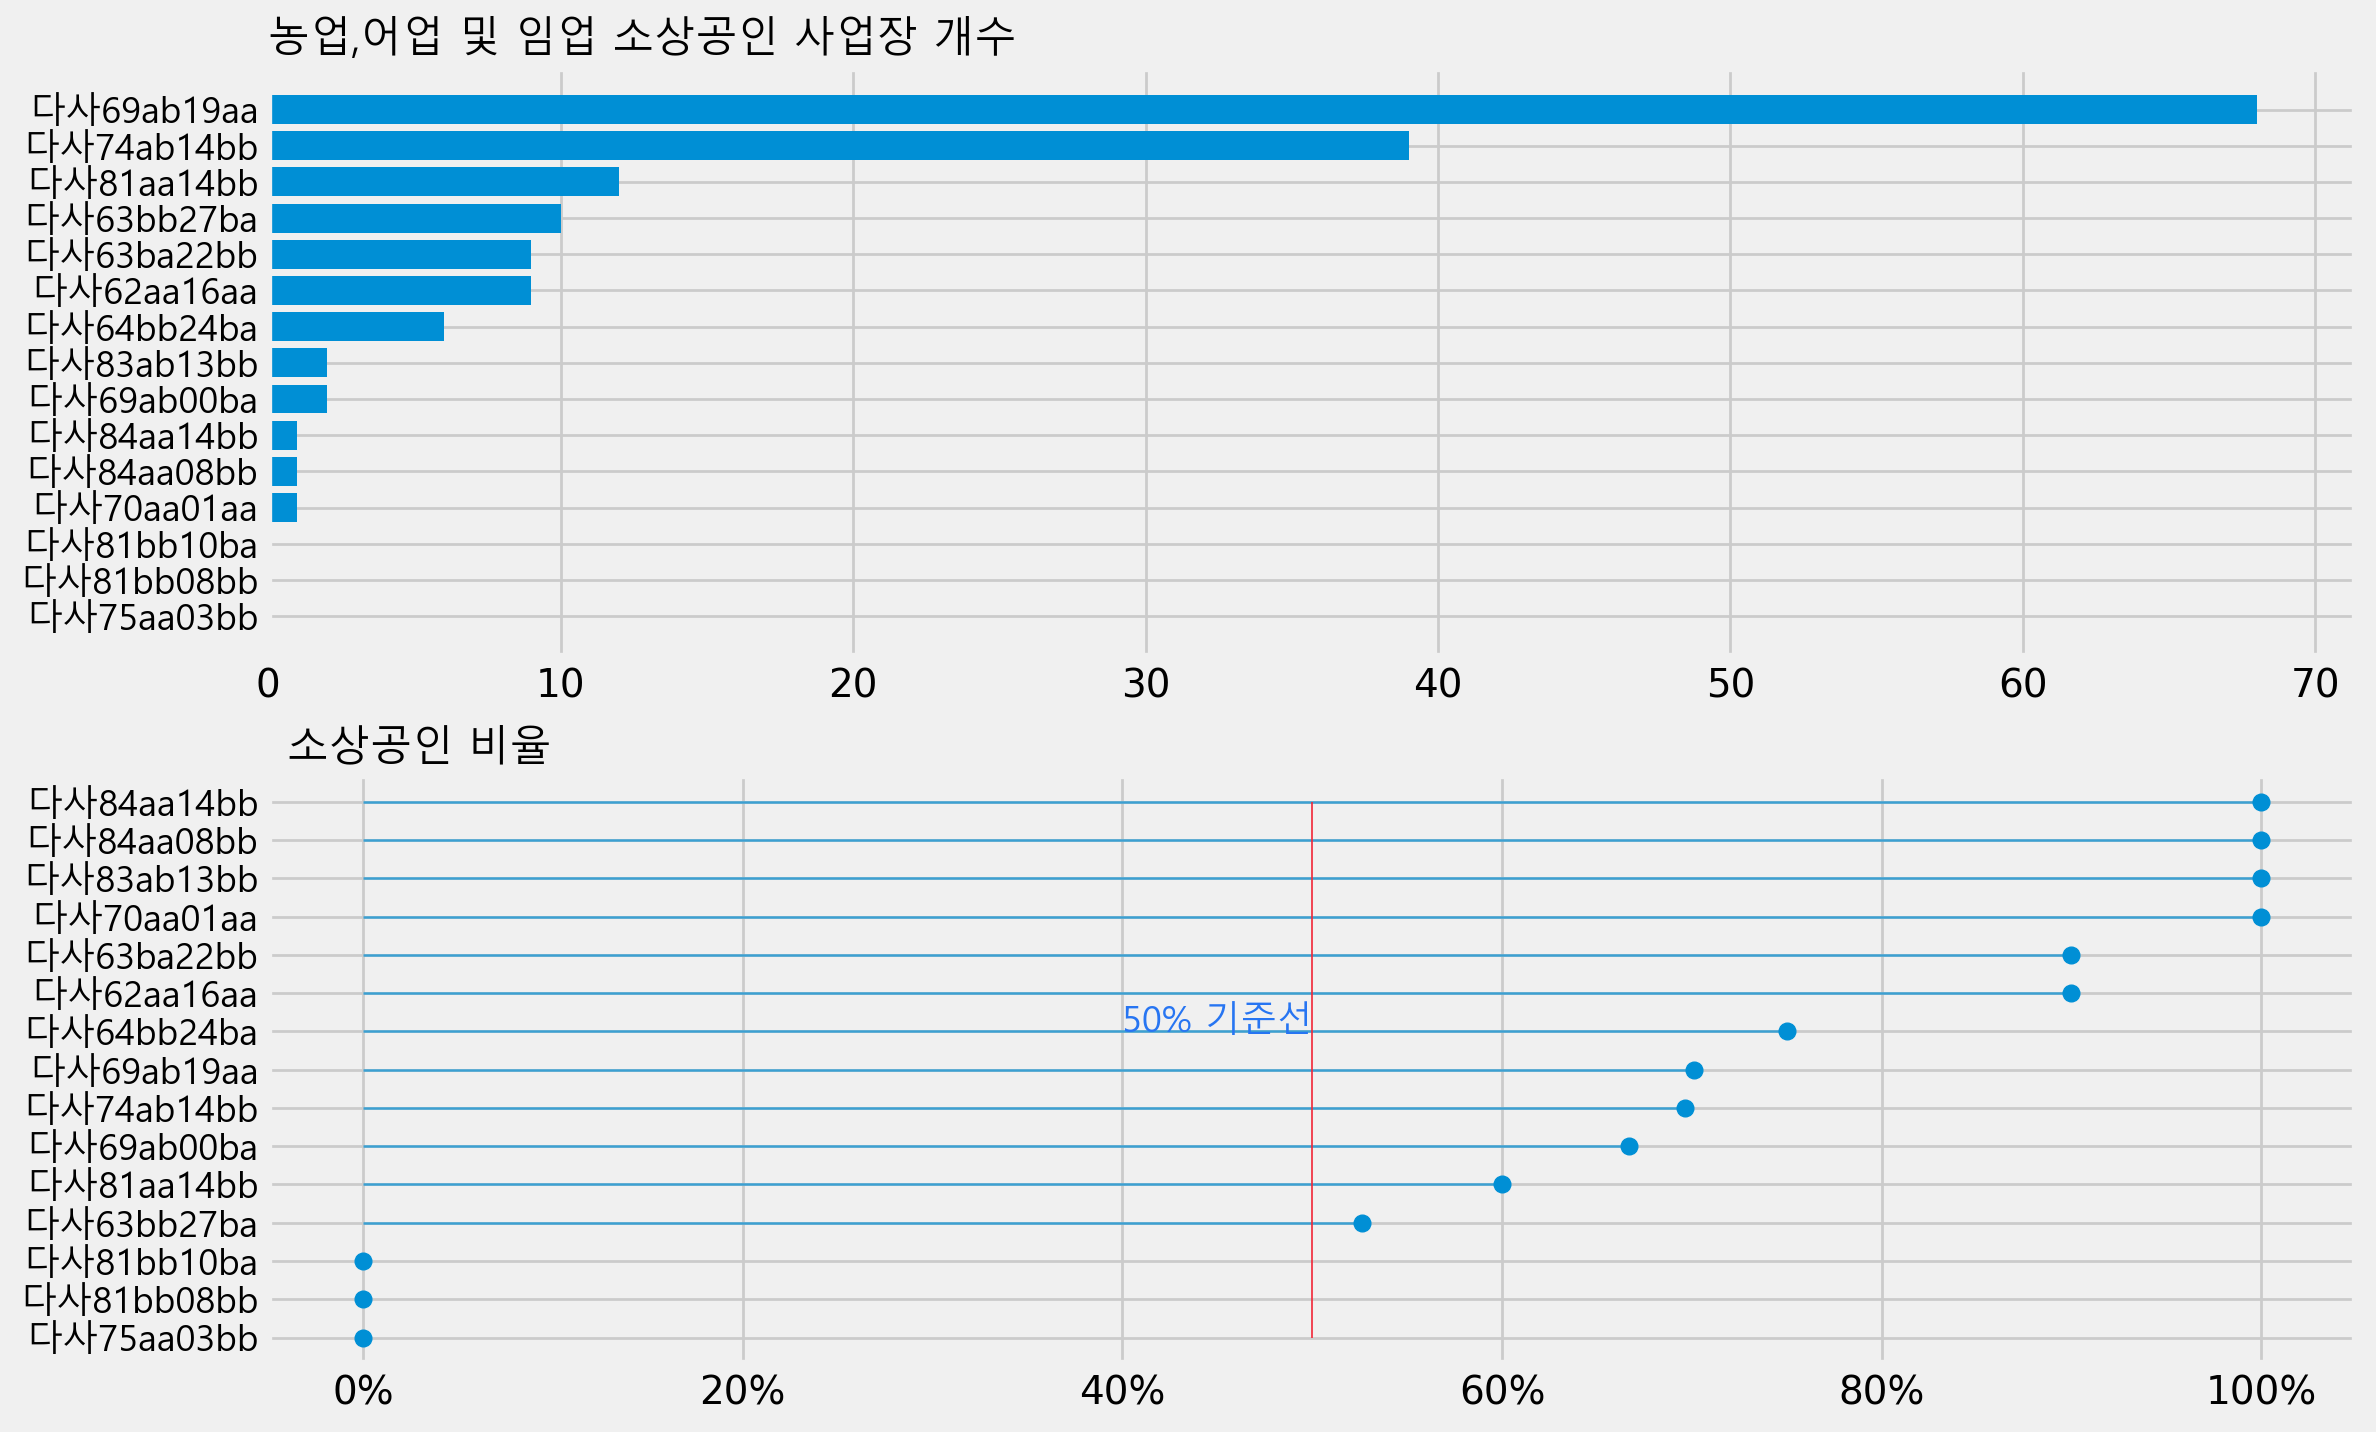

In [19]:
# 소상공인 사업장이 몇개인지.
df_a_sub=df_a[['smbiz_yn_cnt','ws_cnt']]
df_a_sub['소상공인 비율']=df_a_sub['smbiz_yn_cnt']/df_a_sub['ws_cnt']
df_a_sub=df_a_sub.sort_values(by='소상공인 비율')

idx=df_a.smbiz_yn_cnt.sort_values().index

fig,ax=plt.subplots(2,1,figsize=(12,8),dpi=200)
ax[0].barh(y=df_a.loc[idx,'gid'].values,width=df_a.loc[idx,'smbiz_yn_cnt'].values)

ax[0].set_yticklabels(df_a.loc[idx,'gid'].values,fontproperties=fontprop)
ax[0].set_title("농업,어업 및 임업 소상공인 사업장 개수",fontproperties=fontprop,loc='left',fontsize=15)

ax[1].hlines(y=range(15),xmin=0,xmax=df_a_sub['소상공인 비율']*100,alpha=0.7,lw=0.9)
ax[1].scatter(x=df_a_sub['소상공인 비율']*100,y=range(15))
ax[1].set_yticks(range(15))
ax[1].set_yticklabels(df_a.loc[df_a_sub.index,'gid'].values,fontproperties=fontprop)
ax[1].vlines(x=50,ymin=0,ymax=14,lw=0.6,color='#f22738')
ax[1].annotate(text="50% 기준선",xy=(40,8),fontproperties=fontprop,color='#2775f2')
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter())
ax[1].text(s="소상공인 비율",x=-4,y=15.1,fontproperties=fontprop,fontsize=15)
plt.show()

### 24페이지

In [20]:
# 크롤링코드 참고.
realprice=pd.read_csv('realprice.csv',encoding='cp949',thousands=',')

pd.options.display.float_format = '{:,.2f}'.format
realprice.groupby(['주소'],as_index=False)['공시지가(원/m2)'].mean()

,주소,공시지가(원/m2)
0,경기도 용인시 기흥구,"1,343,537.63"
1,경기도 용인시 수지구,"1,657,246.89"
2,경기도 용인시 처인구,"340,774.77"


### 25페이지

In [21]:
# 어느 구역이 많이 휴페업점이 많은지.
df_a_sub=df_a.loc[df_a.runout_cnt>0,['gid','ws_cnt','runout_cnt','구']]
df_a_sub['사업장 대비 휴/폐점 비율']=df_a_sub['runout_cnt']/df_a_sub['ws_cnt']
df_a_sub

,gid,ws_cnt,runout_cnt,구,사업장 대비 휴/폐점 비율
342,다사63bb27ba,19,2,용인시수지구,0.11
991,다사69ab19aa,97,1,용인시기흥구,0.01
1444,다사74ab14bb,56,1,용인시처인구,0.02


### 30페이지, 33페이지

In [22]:
df_j=store[store.indcd_j_yn=='Y']
v=df_j.gid.values
j_geo=geo.loc[v]

j_drop = j_geo.drop(['indcd_a_yn','indcd_b_yn','indcd_c_yn','indcd_d_yn', 'indcd_e_yn','indcd_f_yn','indcd_g_yn',
            'indcd_h_yn','indcd_i_yn','indcd_j_yn','indcd_k_yn','indcd_l_yn','indcd_m_yn','indcd_n_yn',
            'indcd_o_yn','indcd_p_yn','indcd_q_yn','indcd_r_yn','indcd_s_yn','indcd_t_yn','indcd_u_yn'], axis = 1)
j_drop = j_drop.drop(['age10_ratio', 'age20_ratio', 'age30_ratio','age40_ratio','age50_ratio','age60_ratio','age70_ratio'], axis = 1)
j_drop = j_drop.dropna()

j_copy = j_drop.append(j_drop.sum(axis=0), ignore_index = True)
a = j_drop.sum(axis=0)

In [23]:
# manufacturing area 
df_c=store[store.indcd_c_yn=='Y']
v2 = df_c.gid.values
c_geo = geo.loc[v2]

c_drop = c_geo.drop(['indcd_a_yn','indcd_b_yn','indcd_c_yn','indcd_d_yn', 'indcd_e_yn','indcd_f_yn','indcd_g_yn',
            'indcd_h_yn','indcd_i_yn','indcd_j_yn','indcd_k_yn','indcd_l_yn','indcd_m_yn','indcd_n_yn',
            'indcd_o_yn','indcd_p_yn','indcd_q_yn','indcd_r_yn','indcd_s_yn','indcd_t_yn','indcd_u_yn'], axis = 1)
c_drop = c_drop.drop(['age10_ratio', 'age20_ratio', 'age30_ratio','age40_ratio','age50_ratio','age60_ratio','age70_ratio'], axis = 1)
c_drop = c_drop.dropna()

c_drop.sum(axis = 0)
c_drop.append(c_drop.sum(axis=0), ignore_index = True)
c_copy = c_drop.append(c_drop.sum(axis=0), ignore_index = True)

a1 = c_drop.sum(axis=0)

<AxesSubplot:title={'center':'years'}>

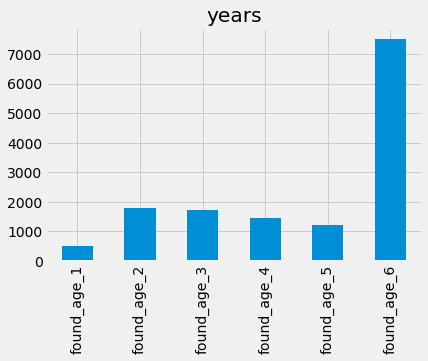

In [24]:
a1[1:7].plot(kind='bar',grid = True, title = 'years')

<AxesSubplot:title={'center':'years'}>

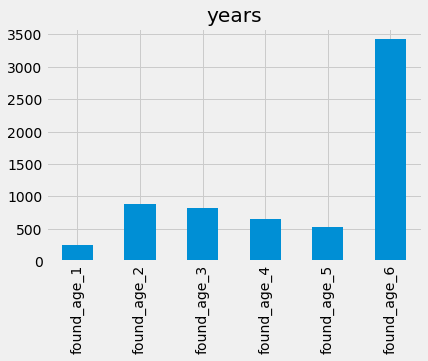

In [25]:
a[1:7].plot(kind='bar',grid = True, title = 'years')

### 33페이지

<AxesSubplot:title={'center':'years'}, ylabel='None'>

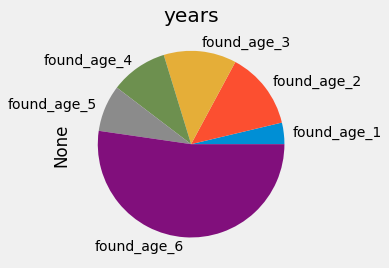

In [26]:
a[1:7].plot(kind='pie',grid = True, title = 'years')

<AxesSubplot:title={'center':'years'}, ylabel='None'>

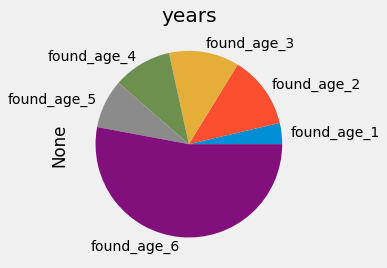

In [27]:
a1[1:7].plot(kind='pie',grid = True, title = 'years')

<AxesSubplot:title={'center':'years'}, ylabel='None'>

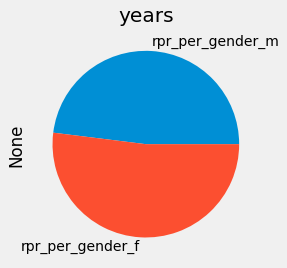

In [28]:
a[9:11].plot(kind='pie',grid = True, title = 'years')

### 35페이지

<AxesSubplot:title={'center':'years'}, ylabel='None'>

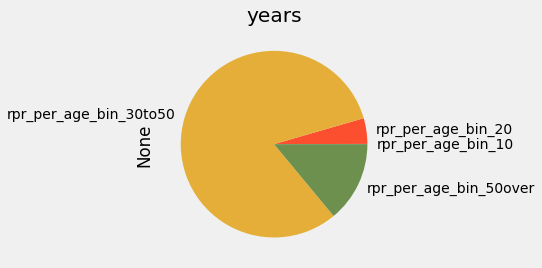

In [29]:
# 대표 나이 비교

a[11:15].plot(kind='pie',grid = True, title = 'years')

<AxesSubplot:title={'center':'years'}, ylabel='None'>

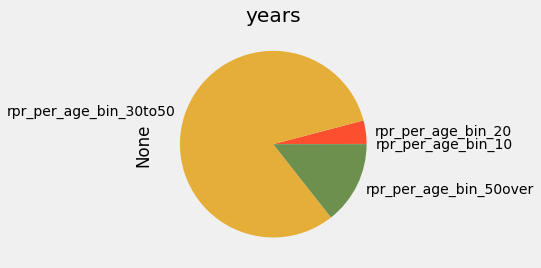

In [30]:
# 대표 나이 비교
a1[11:15].plot(kind='pie',grid = True, title = 'years')

### 36페이지, 40페이지

<AxesSubplot:title={'center':'# of Loan (c)'}>

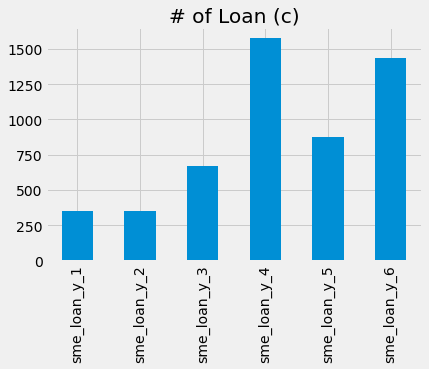

In [31]:
a1[16:22].plot(kind='bar',grid = True, title = '# of Loan (c)')

<AxesSubplot:title={'center':'# of Loan (j)'}>

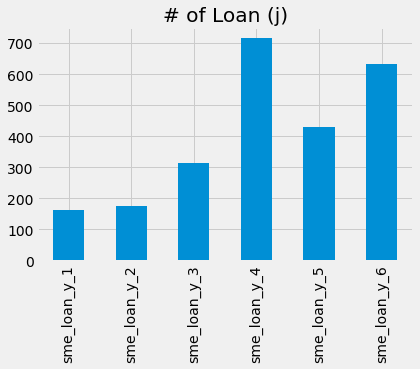

In [32]:
a[16:22].plot(kind='bar',grid = True, title = '# of Loan (j)')

### 38페이지

In [33]:
alphabet=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u']
comparedatax = []
comparedatay = []

for i in alphabet:
    instance = store[store['indcd_%s_yn' %(i)] =='Y']
    if instance.sum().ws_cnt  > 100: 
        comparedatax.append('%s' %(i))
        sample = store[store['indcd_%s_yn' %(i)] =='Y'].sum().runout_cnt/store[store['indcd_%s_yn' %(i)] =='Y'].sum().ws_cnt * 100
        comparedatay.append(sample)
print(comparedatax)
print(comparedatay)

['a', 'c', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't']
[1.7316017316017316, 3.6757401152394196, 3.4853420195439737, 3.634306404163838, 3.7379718726868987, 3.746424719838702, 3.974956319161328, 4.436860068259386, 3.5601265822784813, 3.9174741062479117, 3.8985439173320806, 3.783382789317508, 3.7246448512262353, 3.8838185330757447, 3.731043486994075, 3.4246575342465753]


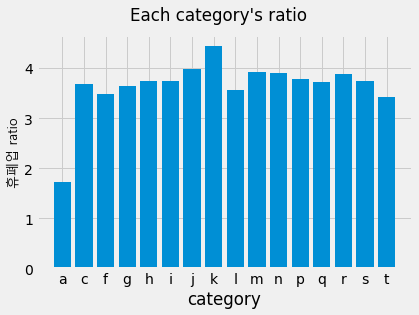

In [34]:
# j 산업과 c 산업을 보자. 

plt.bar(comparedatax, comparedatay)
plt.suptitle("Each category's ratio" )
plt.xlabel('category')
plt.ylabel('휴폐업 ratio',fontproperties=fontprop)
plt.show()

##  (휴폐업 수 /총 사업체 수)